In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
# activation function and its derivative

def sigmoid(s):
  return 1 / (1 + np.exp(-s))

def sigmoid_prime(s):
  return sigmoid(s) * (1 - sigmoid(s))

# FFNN class definition 
class FFNN(object):
  def __init__(self, input_size=2, hidden_size=2, output_size=1):
    # Adding 1 as it will be our bias
    self.input_size = input_size + 1
    self.hidden_size = hidden_size + 1
    self.output_size = output_size
    
    self.o_error = 0
    self.o_delta = 0
    self.z1 = 0
    self.z2 = 0
    self.z3 = 0
    self.z2_error = 0
    # The whole weight matrix, from the inputs till the hidden layer
    self.w1 = np.random.randn(self.input_size, self.hidden_size)
    # The final set of weights from the hidden layer till the output layer
    self.w2 = np.random.randn(self.hidden_size, self.output_size)

  def forward(self, X):
    # Forward propagation through our network
    X['bias'] = 1 # Adding 1 to the inputs to include the bias in the weight
    self.z1 = np.dot(X, self.w1) # dot product of X (input) and first set of 3x2 weights
    self.z2 = sigmoid(self.z1) # activation function
    self.z3 = np.dot(self.z2, self.w2) # dot product of hidden layer (z2) and second set of 3x1 weights
    o = sigmoid(self.z3) # final activation function
    return o

  # Alias for forward function, predict() is commonly used for clasificators
  def predict(self, X):
    return self.forward(self, X)

  def backward(self, X, y, output, step):
    # Backward propagation of the errors X['bias'] = 1 # Adding 1 to the inputs to include the bias in the weight
    self.o_error = y - output # error in output
    self.o_delta = self.o_error * sigmoid_prime(output) * step # applying derivative of sigmoid to error
    self.z2_error = self.o_delta.dot(self.w2.T) # z2 error: how much our hidden layer weights contributed to output error
    self.z2_delta = self.z2_error * sigmoid_prime(self.z2) * step # applying derivative of sigmoid to z2 error
    self.w1 += X.T.dot(self.z2_delta) # adjusting first of weights
    self.w2 += self.z2.T.dot(self.o_delta) # adjusting second set of weights
    
    
  def fit(self, X, y, epochs=100, step=0.05, verbose=False):
    for epoch in range(epochs):
      X['bias'] = 1 # Adding 1 to the inputs to include the bias in the weight
      output = self.forward(X)
      self.backward(X, y, output, step)
      if(verbose):
        print("Epoch: {}\t Error = {}".format(epoch+1, self.o_error))
      


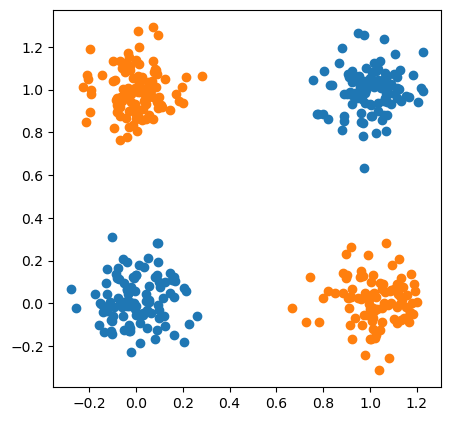

In [3]:
# data creation
centers = [[0,0],[0,1],[1,0],[1,1]]
X, y = make_blobs(400,2,centers = centers,cluster_std=0.1)

# XOR logic gate
y = np.array([0 if (old == 3 or old == 0) else 1 for old in y])
# AND logic gate
#y = np.array([1 if old == 3 else 0 for old in y])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

fig, ax = plt.subplots(figsize = (5,5), dpi=100)

for i in np.unique(y):
  ds = X[y == i]
  plt.scatter(ds[:,0],ds[:,1])


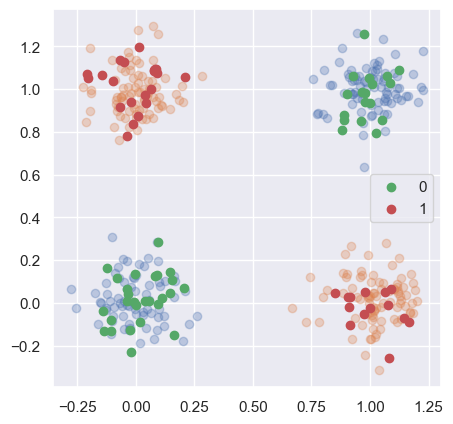

In [20]:
my_network = FFNN()

y_pred = pd.DataFrame(X_test).apply(my_network.forward, axis=1)
y_pred = [i[0] for i in y_pred]

my_network.fit(pd.DataFrame(X_train), pd.DataFrame(y_train), epochs=10000, step=0.05)

y_pred = pd.DataFrame(X_test).apply(my_network.forward, axis=1)
y_pred = [i[0] for i in y_pred]


fig, ax = plt.subplots(figsize = (5,5), dpi=100)

for i in np.unique(y):
  ds = X_train[y_train == i]
  plt.scatter(ds[:,0],ds[:,1],alpha=0.3)

for i in np.unique(y):
  ds = X_test[np.around(y_pred,0) == i]
  plt.scatter(ds[:,0],ds[:,1], label=i)

plt.legend()


In [21]:
# Imprimimos el reporte de clasificación y la matriz de confusion con ayuda del 
# codigo de ejemplo proporcionado
ytest = y_test
yfit = np.around(y_pred,0)

from sklearn.metrics import classification_report
print(classification_report(ytest, yfit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        35

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



Text(225.0, 0.5, 'Etiqueta predicha')

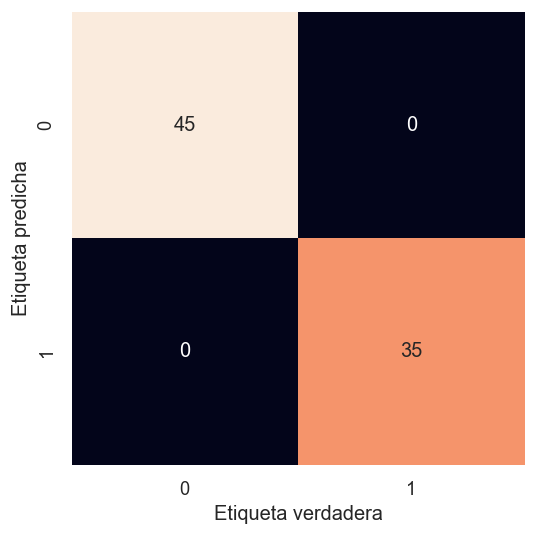

In [22]:
import seaborn as sns   #Seaborn = Statistical data visualization
sns.set()               #Asigna los valores default de Seaborn plotting
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(8,5), dpi = 120)
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Etiqueta verdadera')
plt.ylabel('Etiqueta predicha')

In [23]:
# weights prints
print("w_1\n",my_network.w1)
print()
print("w_2\n",my_network.w2)

w_1
              0         1         2
0    -1.230581 -7.087178 -0.221106
1     1.535969  7.150604 -0.031085
bias -1.456013  2.069815 -1.440480

w_2
 [[ 65.74863113]
 [-27.20642886]
 [  4.84428399]]
